In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')



In [4]:
df_train.shape , df_test.shape

((1117957, 22), (745305, 21))

In [5]:
df_train.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,4,2,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,6,9,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,5,6,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,8,5,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,3,5,2,2,6,6,4,1,2,3,5,0.415


In [6]:
df_test.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,4,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,4,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,2,7,9,2,5,5,2,3,6,8,3
3,1117960,2,4,4,6,4,5,4,3,4,4,7,8,4,6,7,6,4,2,4,4
4,1117961,6,3,2,4,6,4,5,5,3,7,4,3,2,6,4,6,8,4,5,5


In [7]:
df_train.drop(['id'], axis=1, inplace=True)

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 21 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   MonsoonIntensity                 1117957 non-null  int64  
 1   TopographyDrainage               1117957 non-null  int64  
 2   RiverManagement                  1117957 non-null  int64  
 3   Deforestation                    1117957 non-null  int64  
 4   Urbanization                     1117957 non-null  int64  
 5   ClimateChange                    1117957 non-null  int64  
 6   DamsQuality                      1117957 non-null  int64  
 7   Siltation                        1117957 non-null  int64  
 8   AgriculturalPractices            1117957 non-null  int64  
 9   Encroachments                    1117957 non-null  int64  
 10  IneffectiveDisasterPreparedness  1117957 non-null  int64  
 11  DrainageSystems                  1117957 non-null 

In [9]:
df_train.isna().sum()

MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

In [10]:
import warnings
warnings.filterwarnings("ignore")

<Axes: xlabel='FloodProbability', ylabel='Count'>

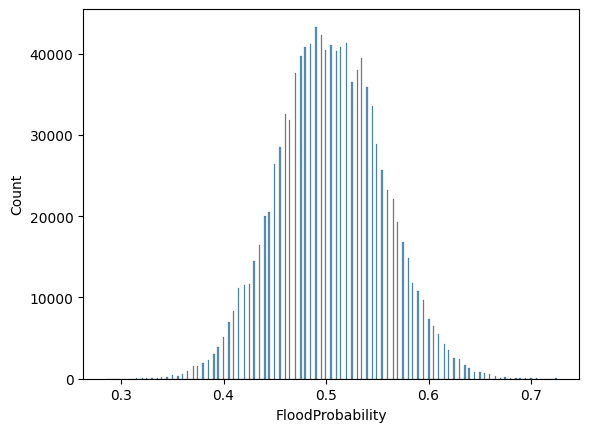

In [11]:
sns.histplot(df_train['FloodProbability'])

In [12]:
numerical_columns = ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors']

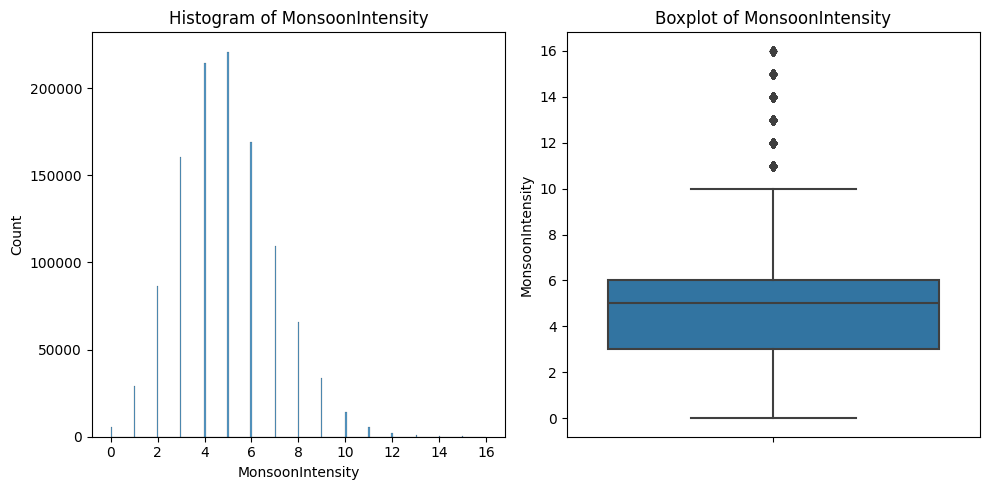

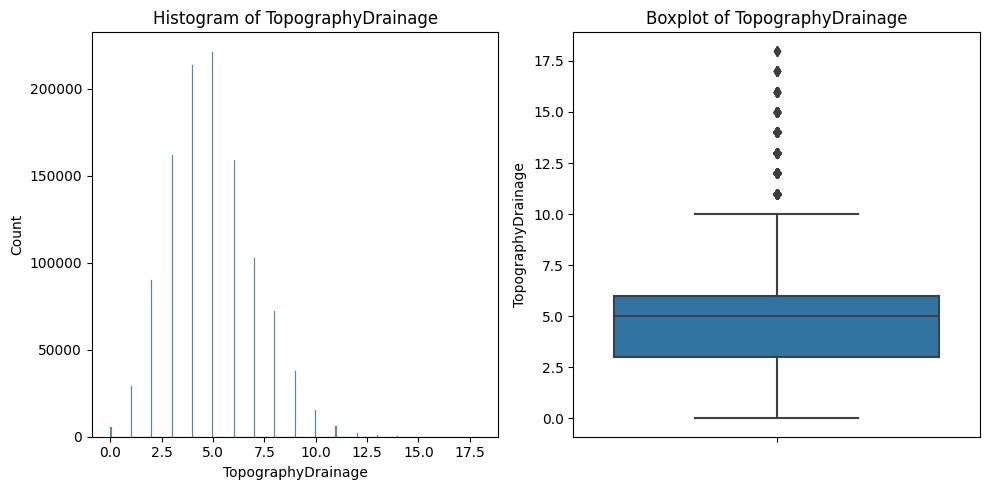

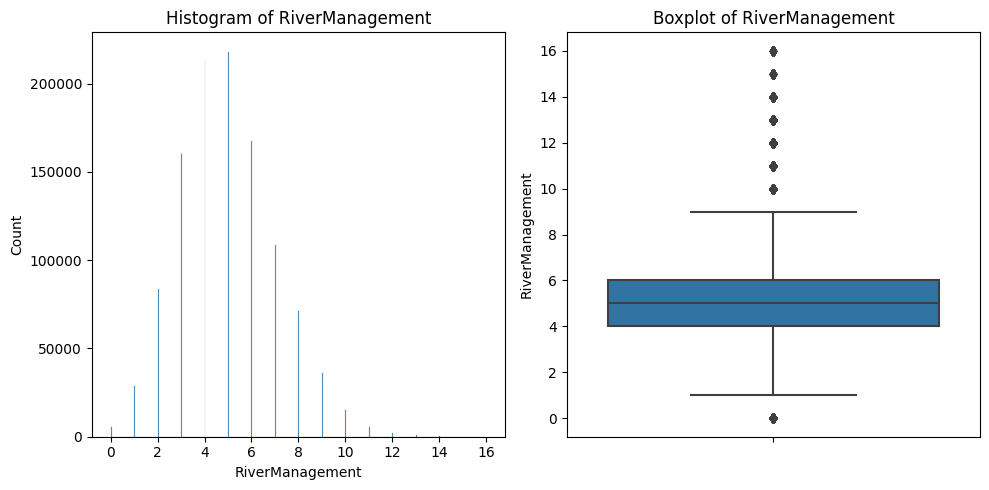

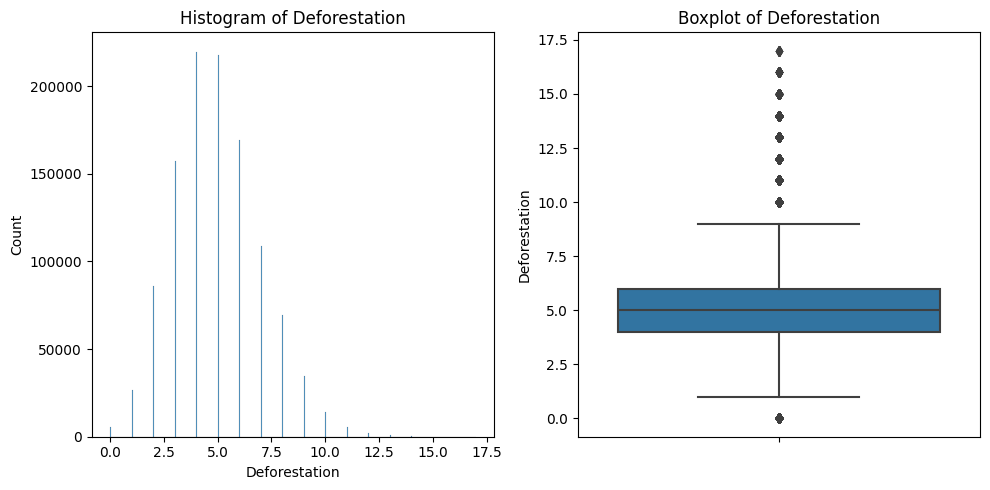

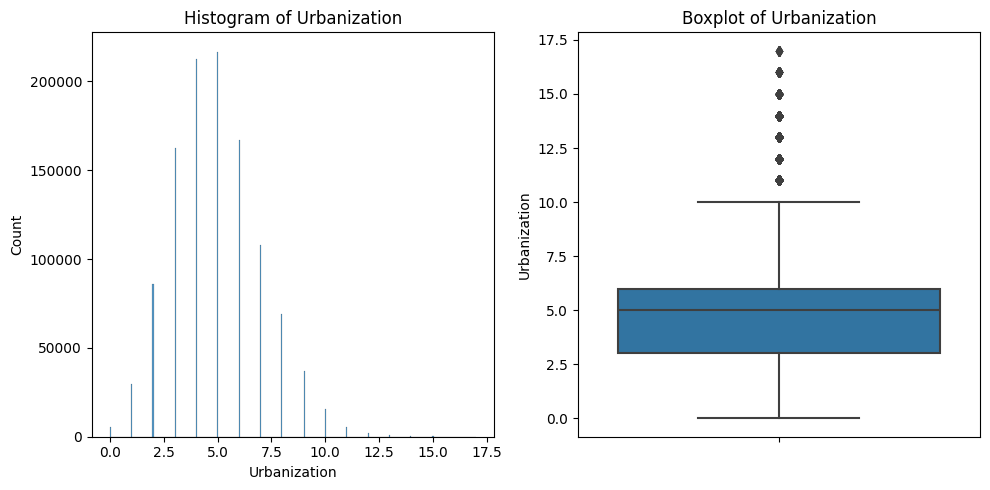

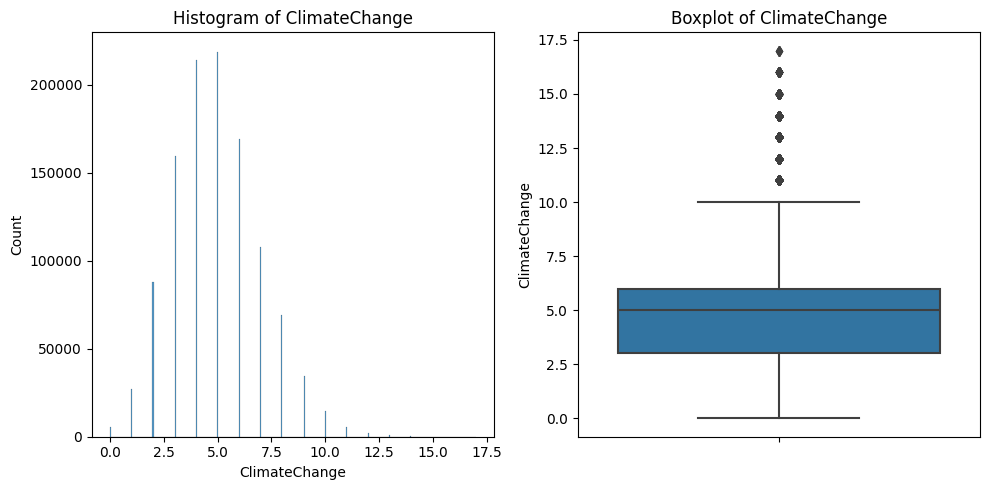

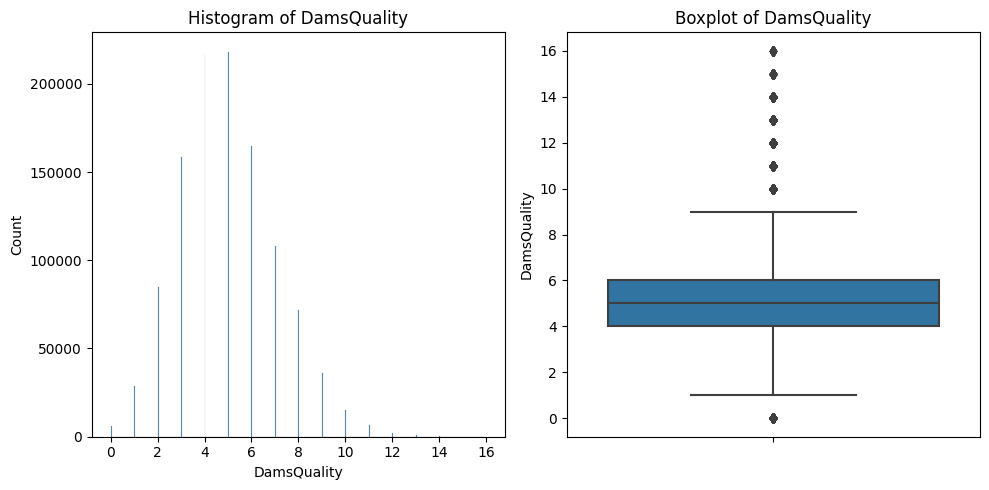

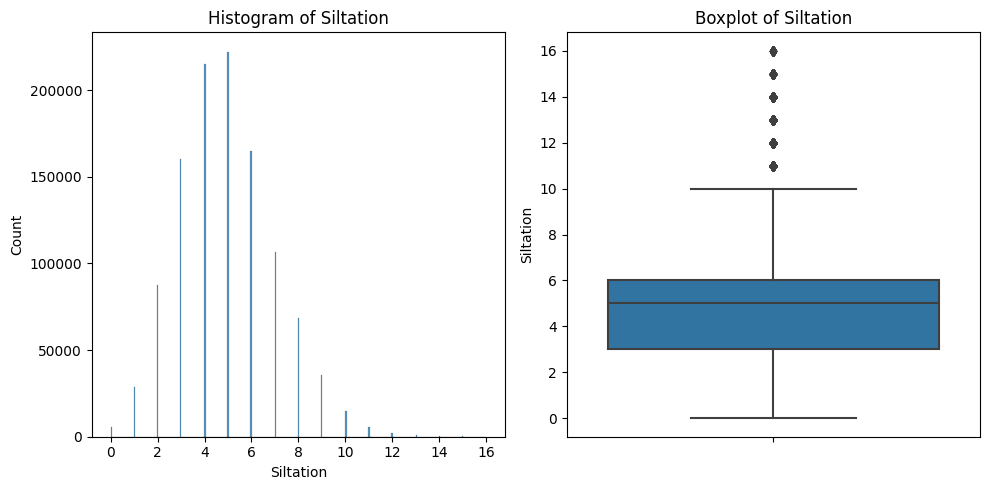

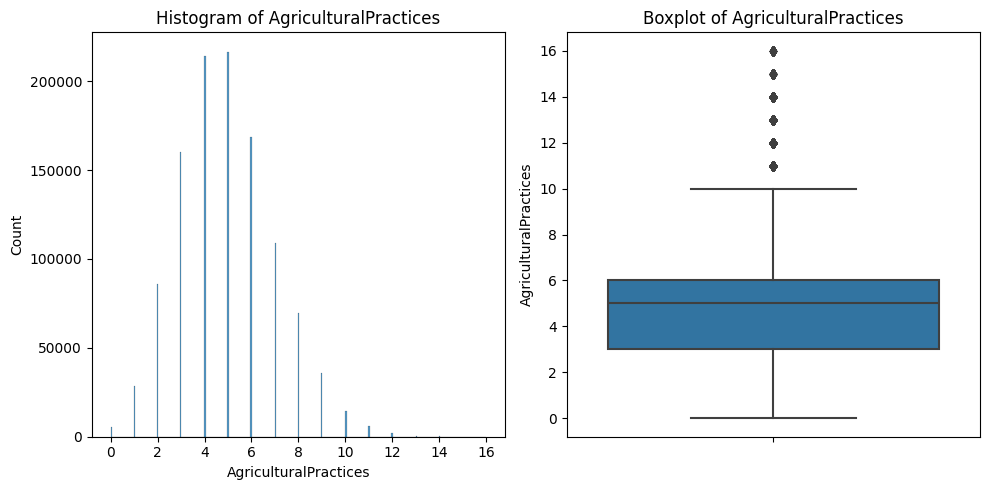

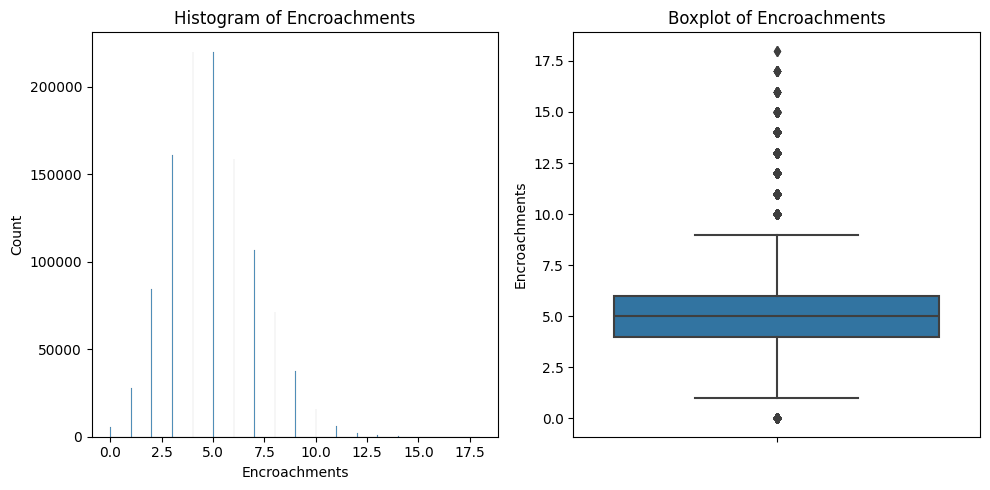

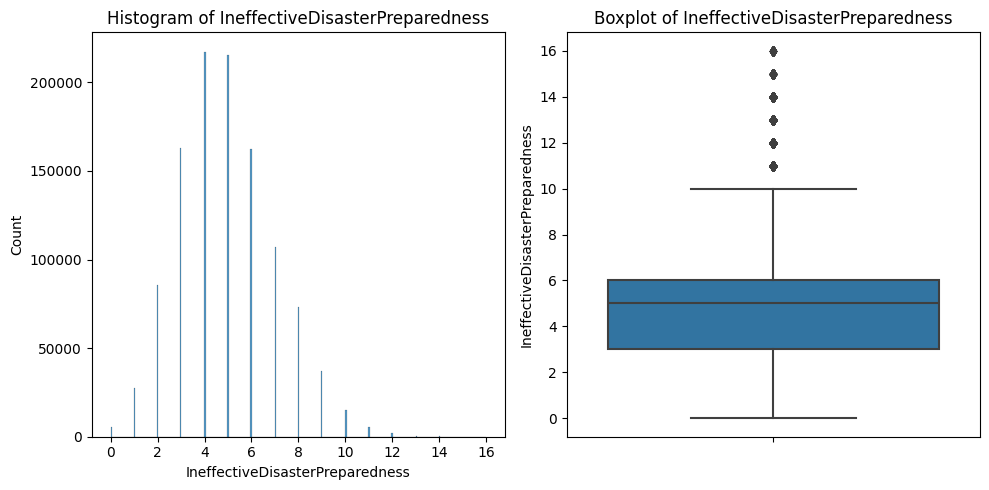

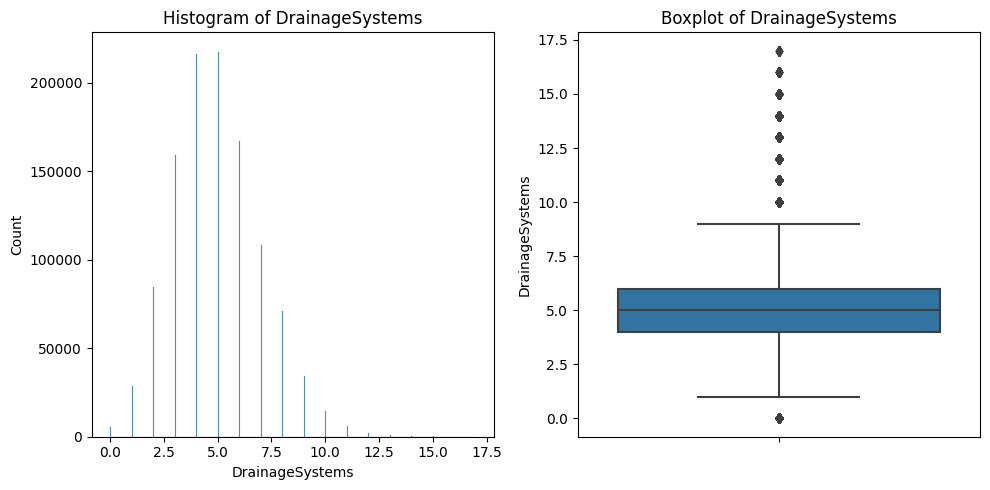

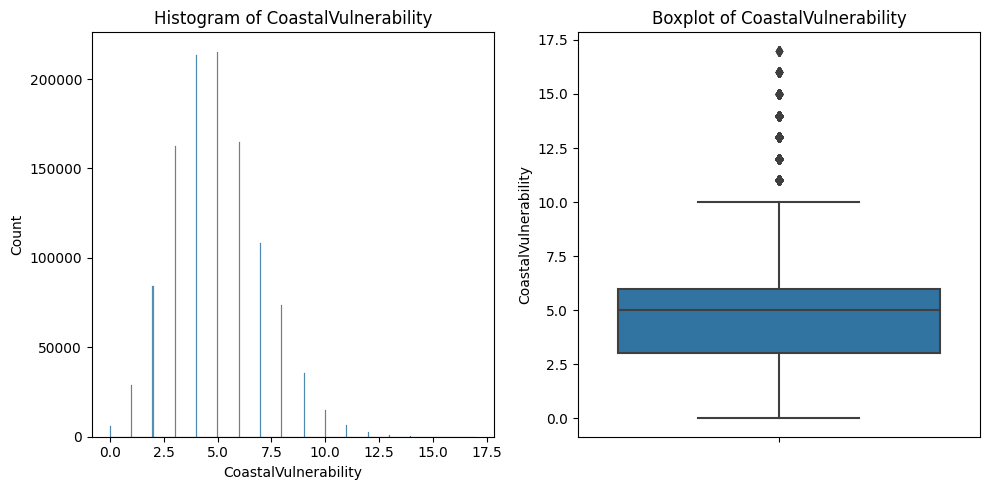

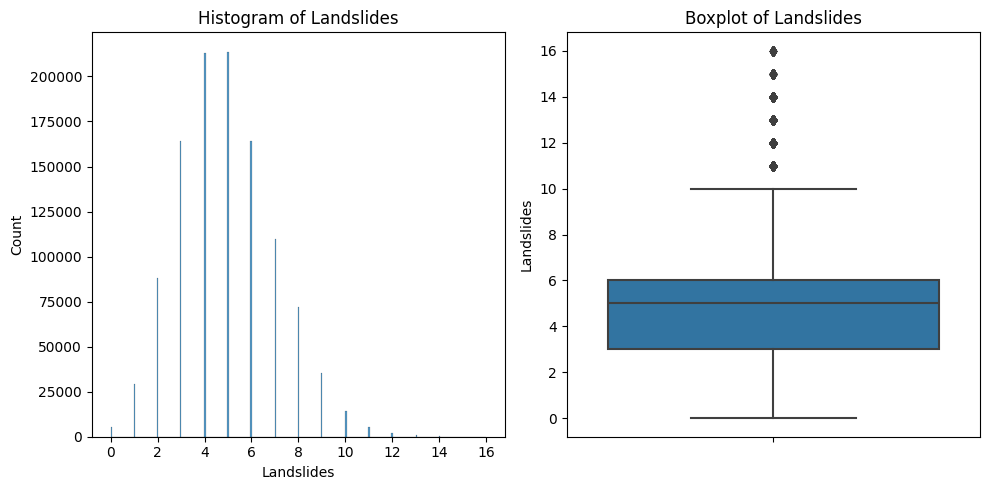

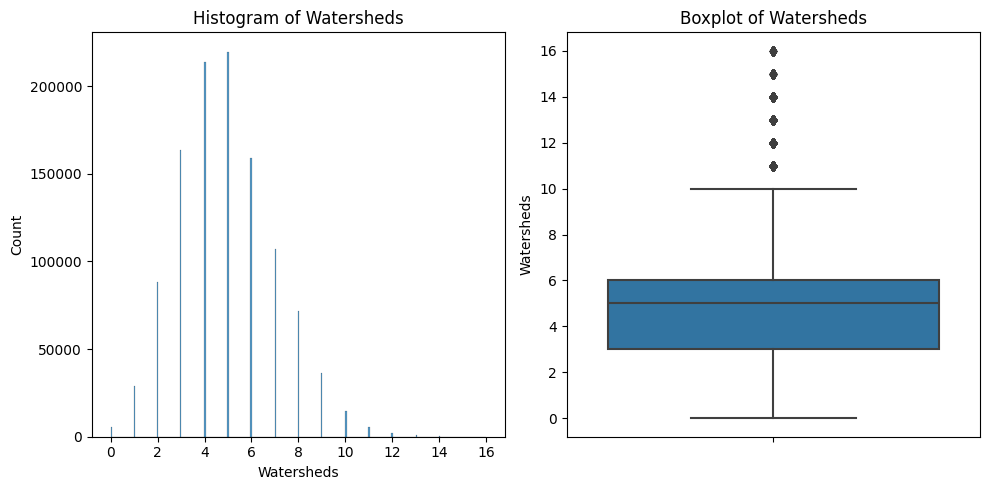

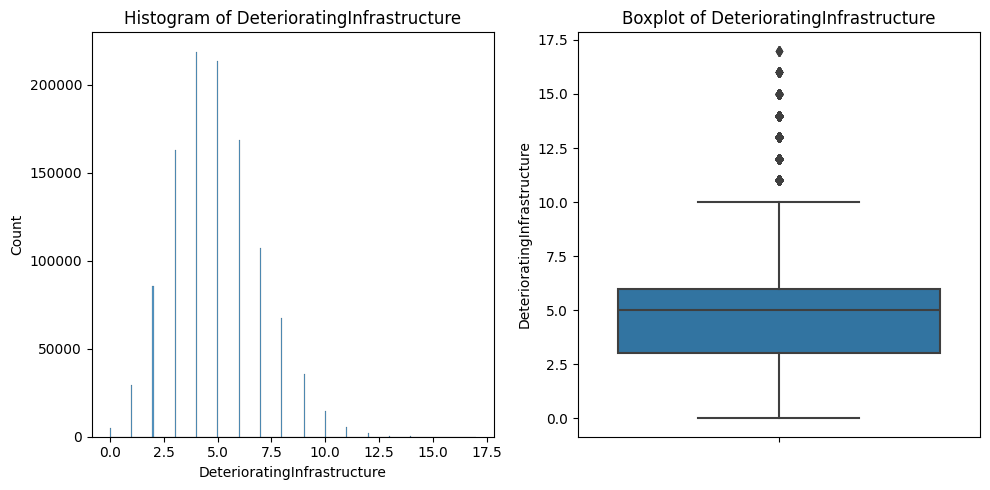

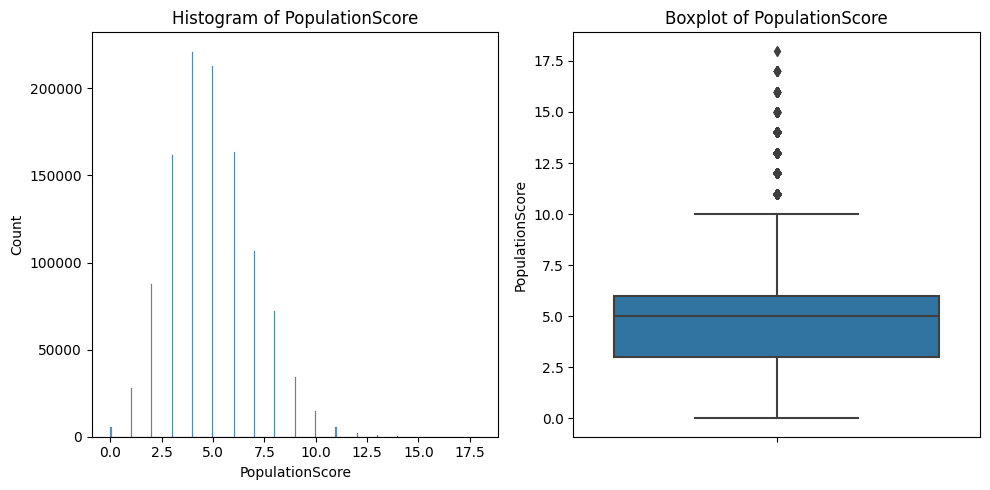

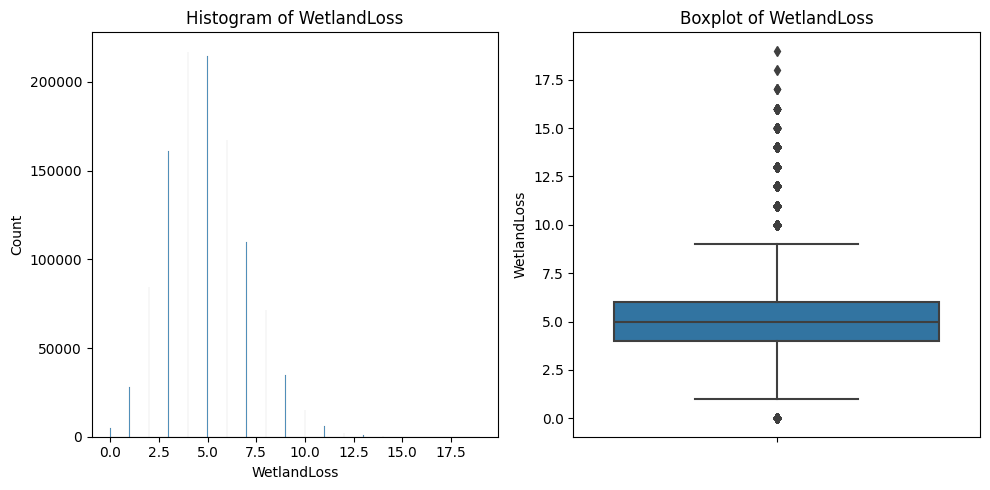

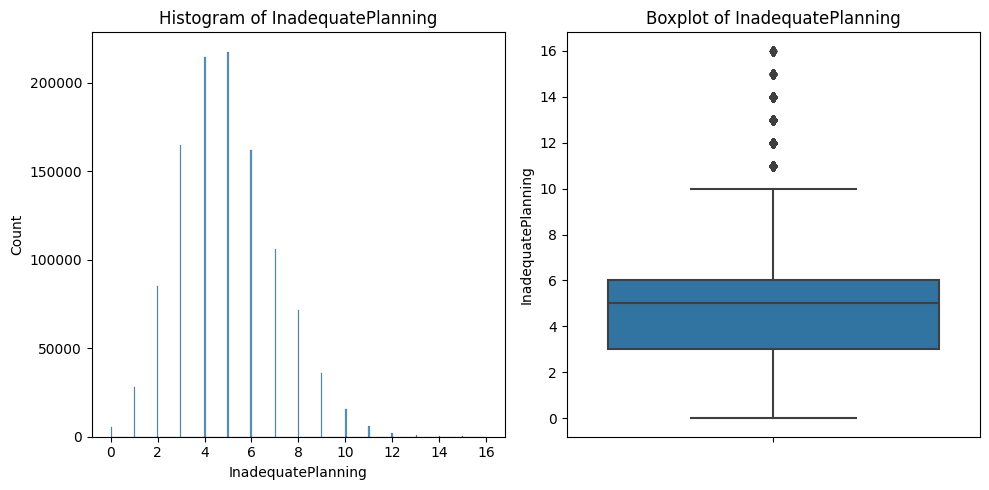

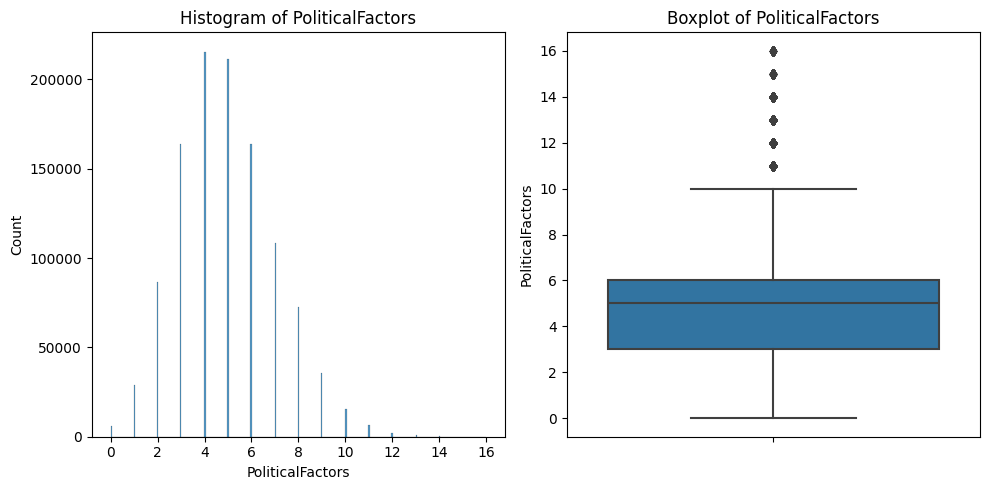

In [13]:


for column in numerical_columns:
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    sns.histplot(data=df_train, x=column, ax=axs[0])
    axs[0].set_title(f'Histogram of {column}')

    sns.boxplot(data=df_train, y=column, ax=axs[1])
    axs[1].set_title(f'Boxplot of {column}')

    plt.tight_layout()
    plt.show()

In [14]:
X = df_train.drop(['FloodProbability'], axis=1)
y = df_train['FloodProbability']


In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,0.038198,1.467769,0.021561,1.490363,0.507578,-0.453941,-0.458881,-0.933107,-0.939124,-0.455632,-1.417247,0.025627,-0.935421,-0.929312,0.034080,-0.448422,0.999183,0.023754,0.989569,-0.927598
1,0.524488,0.990186,-0.461022,-0.459251,1.467552,1.489938,-0.938943,0.034951,-0.455692,0.504372,1.951149,0.990723,-1.414142,-2.372809,-0.926353,0.035884,-0.929294,-0.943039,-0.451962,-0.927598
2,0.524488,0.035021,0.504143,1.002959,-0.932383,1.003968,-1.899068,0.034951,-0.455692,0.024370,0.507551,0.990723,-0.935421,0.995351,0.034080,0.520189,1.481302,-1.426435,-0.932472,-0.927598
3,-0.934382,-0.442562,0.504143,0.028152,-0.452396,1.489938,-0.458881,1.003010,0.511171,1.464377,0.026351,-1.422018,-0.456700,0.995351,-0.446137,-0.448422,0.517064,0.023754,0.989569,0.029180
4,0.038198,-0.920145,-1.426186,0.515556,-0.452396,-0.453941,-0.938943,-0.933107,-0.939124,-0.935635,0.026351,-1.422018,-1.414142,0.514185,0.514296,-0.448422,-1.893533,-1.426435,-0.932472,0.029180


In [16]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [22]:
#decision tree
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print('Decision Tree Regressor')
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))


Decision Tree Regressor
Mean Squared Error: 0.002454404339153458
R2 Score: 0.05573532001846604


In [23]:
#gradient boosting
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

print('Gradient Boosting Regressor')
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))


Gradient Boosting Regressor
Mean Squared Error: 0.0010025672298803712
R2 Score: 0.6142897853539969


In [30]:
#predicting on test data
X_test = df_test.drop(['id'], axis=1)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_test_scaled.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,-0.448092,0.512604,-0.943604,0.028152,0.507578,1.003968,1.461369,1.003010,1.478035,-0.455632,1.469950,0.025627,0.979464,0.033020,0.514296,-0.932727,0.517064,-0.459642,-0.451962,0.029180
1,-0.448092,-0.442562,-1.426186,1.977766,0.027591,0.032029,-0.458881,1.003010,0.027740,-0.455632,-1.417247,-0.456922,0.979464,-0.448146,0.034080,-1.901339,0.999183,-0.459642,-0.451962,-0.927598
2,-1.906963,-0.920145,0.504143,0.028152,0.987565,-1.425881,-0.458881,0.518981,-0.455692,-1.415637,0.988750,1.955819,-1.414142,0.033020,0.034080,-1.417033,-0.929294,0.507151,1.470079,-0.927598
3,-1.420672,-0.442562,-0.461022,0.515556,-0.452396,0.032029,-0.458881,-0.933107,-0.455692,-0.455632,0.988750,1.473271,-0.456700,0.514185,0.994513,0.520189,-0.447175,-1.426435,-0.451962,-0.449209
4,0.524488,-0.920145,-1.426186,-0.459251,0.507578,-0.453941,0.021182,0.034951,-0.939124,0.984374,-0.454848,-0.939470,-1.414142,0.514185,-0.446137,0.520189,1.481302,-0.459642,0.028548,0.029180


In [31]:
#Using Gradient Boosting Regressor

y_pred = gb.predict(X_test_scaled)

y_pred

array([0.54828975, 0.48468716, 0.48656728, ..., 0.54662286, 0.53257813,
       0.49377389])

In [29]:
#Submission file
submission = pd.DataFrame({'id': df_test['id'], 'FloodProbability': y_pred})
submission.to_csv('submission.csv', index=False)
